In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import os

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
%matplotlib inline

In [67]:
df = pd.concat([train,test])
print(len(df))
print(len(train))
print(len(test))

2919
1460
1459


In [68]:
df.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000,2919.000,2919.000,2919.000,2918.000,2918.000,2917.000,2917.000,2918.000,2919.000,...,2919.000,2919.000,1460.000,2919.000,2919.000,2918.000,2919.000,2919.000,2919.000,2919.000
mean,1159.582,336.484,2.602,2.860,441.423,49.582,0.430,0.061,560.772,23.098,...,6.089,2.252,180921.196,16.062,6.452,1051.778,93.710,1971.313,1984.264,2007.793
std,392.362,428.701,25.188,0.823,455.611,169.206,0.525,0.246,439.544,64.244,...,1.410,35.664,79442.503,56.184,1.569,440.766,126.527,30.291,20.894,1.315
min,334.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.000,0.000,34900.000,0.000,2.000,0.000,0.000,1872.000,1950.000,2006.000
25%,876.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,220.000,0.000,...,5.000,0.000,129975.000,0.000,5.000,793.000,0.000,1953.500,1965.000,2007.000
50%,1082.000,0.000,0.000,3.000,368.500,0.000,0.000,0.000,467.000,0.000,...,6.000,0.000,163000.000,0.000,6.000,989.500,0.000,1973.000,1993.000,2008.000
75%,1387.500,704.000,0.000,3.000,733.000,0.000,1.000,0.000,805.500,0.000,...,7.000,0.000,214000.000,0.000,7.000,1302.000,168.000,2001.000,2004.000,2009.000
max,5095.000,2065.000,508.000,8.000,5644.000,1526.000,3.000,2.000,2336.000,1012.000,...,10.000,800.000,755000.000,576.000,15.000,6110.000,1424.000,2010.000,2010.000,2010.000


### Overall Workflow

1. clean or decide what variables to drop completely based on the proportion of NA/missing values
2. data cleaning (bundle categorical variables)
3. check Lasso and drop variables, compute VIF (multicolinearity)
4. heatmap


In [15]:
# overall distribution of variables
# https://seaborn.pydata.org/tutorial/distributions.html
# d.hist()

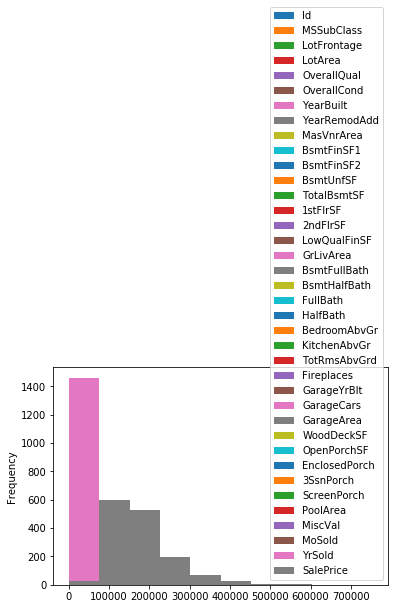

In [8]:
vars = data_features.columns
# vars = numerical_features
figures_per_time = 4
count = 0 
y = y_train
for var in vars:
    x = train[var]
#     print(y.shape,x.shape)
    plt.figure(count//figures_per_time,figsize=(25,5))
    plt.subplot(1,figures_per_time,np.mod(count,4)+1)
    plt.scatter(x, y);
    plt.title('f model: T= {}'.format(var))
    count+=1
    

In [9]:
d.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# missing values



In [ ]:
# some important categorical variables (subjectively i.e. domain? expertise)
# 



# MSZONING??
# Type of Dwelling: MSSubClass, BldgType(important)
# Lot: LotFraontage, LotArea, LotShape (i don't think it matters), LotConfig 
# Geographical: NEIGHBORHOOD?????, Street, Alley
# Functionality: Utilities, 
# LANDCONTOUR (NAH), LandSlope 
# Garage: GarageYrBelt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond
